<a href="https://colab.research.google.com/github/Shan17161/Credit_CardFraud-Dwtwction/blob/main/credit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pylab import rcParams
import warnings
warnings.filterwarnings('ignore')

In [ ]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0


In [ ]:
data=pd.read_csv('creditcard.csv')

In [ ]:
data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        1
V7        1
V8        1
V9        1
V10       1
V11       1
V12       1
V13       1
V14       1
V15       1
V16       1
V17       1
V18       1
V19       1
V20       1
V21       1
V22       1
V23       1
V24       1
V25       1
V26       1
V27       1
V28       1
Amount    1
Class     1
dtype: int64

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45646 entries, 0 to 45645
Data columns (total 31 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Time    45646 non-null  int64  
 1   V1      45646 non-null  float64
 2   V2      45646 non-null  float64
 3   V3      45646 non-null  float64
 4   V4      45646 non-null  float64
 5   V5      45646 non-null  float64
 6   V6      45645 non-null  float64
 7   V7      45645 non-null  float64
 8   V8      45645 non-null  float64
 9   V9      45645 non-null  float64
 10  V10     45645 non-null  float64
 11  V11     45645 non-null  float64
 12  V12     45645 non-null  float64
 13  V13     45645 non-null  float64
 14  V14     45645 non-null  float64
 15  V15     45645 non-null  float64
 16  V16     45645 non-null  float64
 17  V17     45645 non-null  float64
 18  V18     45645 non-null  float64
 19  V19     45645 non-null  float64
 20  V20     45645 non-null  float64
 21  V21     45645 non-null  float64
 22

In [ ]:
data.describe().T.head()

,count,mean,std,min,25%,50%,75%,max
Time,45646.0,27545.441331,12907.770469,0.000000,19891.000000,32447.000000,37571.750000,42437.000000
V1,45646.0,-0.237544,1.886548,-56.407510,-0.985248,-0.246259,1.157412,1.960497
V2,45646.0,0.028942,1.613070,-72.715728,-0.543868,0.088873,0.739723,18.183626
V3,45646.0,0.696718,1.530553,-32.965346,0.222804,0.801638,1.434911,4.101716
V4,45646.0,0.191505,1.403936,-5.172595,-0.714566,0.191835,1.070924,16.491217


In [ ]:
data.shape

(45646, 31)

In [ ]:
data.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [ ]:
fraud_cases=len(data[data['Class']==1])

In [ ]:
print(' Number of Fraud Cases:',fraud_cases)

 Number of Fraud Cases: 142


In [ ]:
non_fraud_cases=len(data[data['Class']==0])

In [ ]:
print('Number of Non Fraud Cases:',non_fraud_cases)

Number of Non Fraud Cases: 45503


In [ ]:
fraud=data[data['Class']==1]

In [ ]:
genuine=data[data['Class']==0]

In [ ]:
fraud.Amount.describe()

count     142.000000
mean       97.592183
std       233.185192
min         0.000000
25%         1.000000
50%         8.370000
75%        99.990000
max      1809.680000
Name: Amount, dtype: float64

In [ ]:
genuine.Amount.describe()

count    45503.000000
mean        90.808470
std        240.322652
min          0.000000
25%          7.580000
50%         24.990000
75%         82.360000
max       7879.420000
Name: Amount, dtype: float64

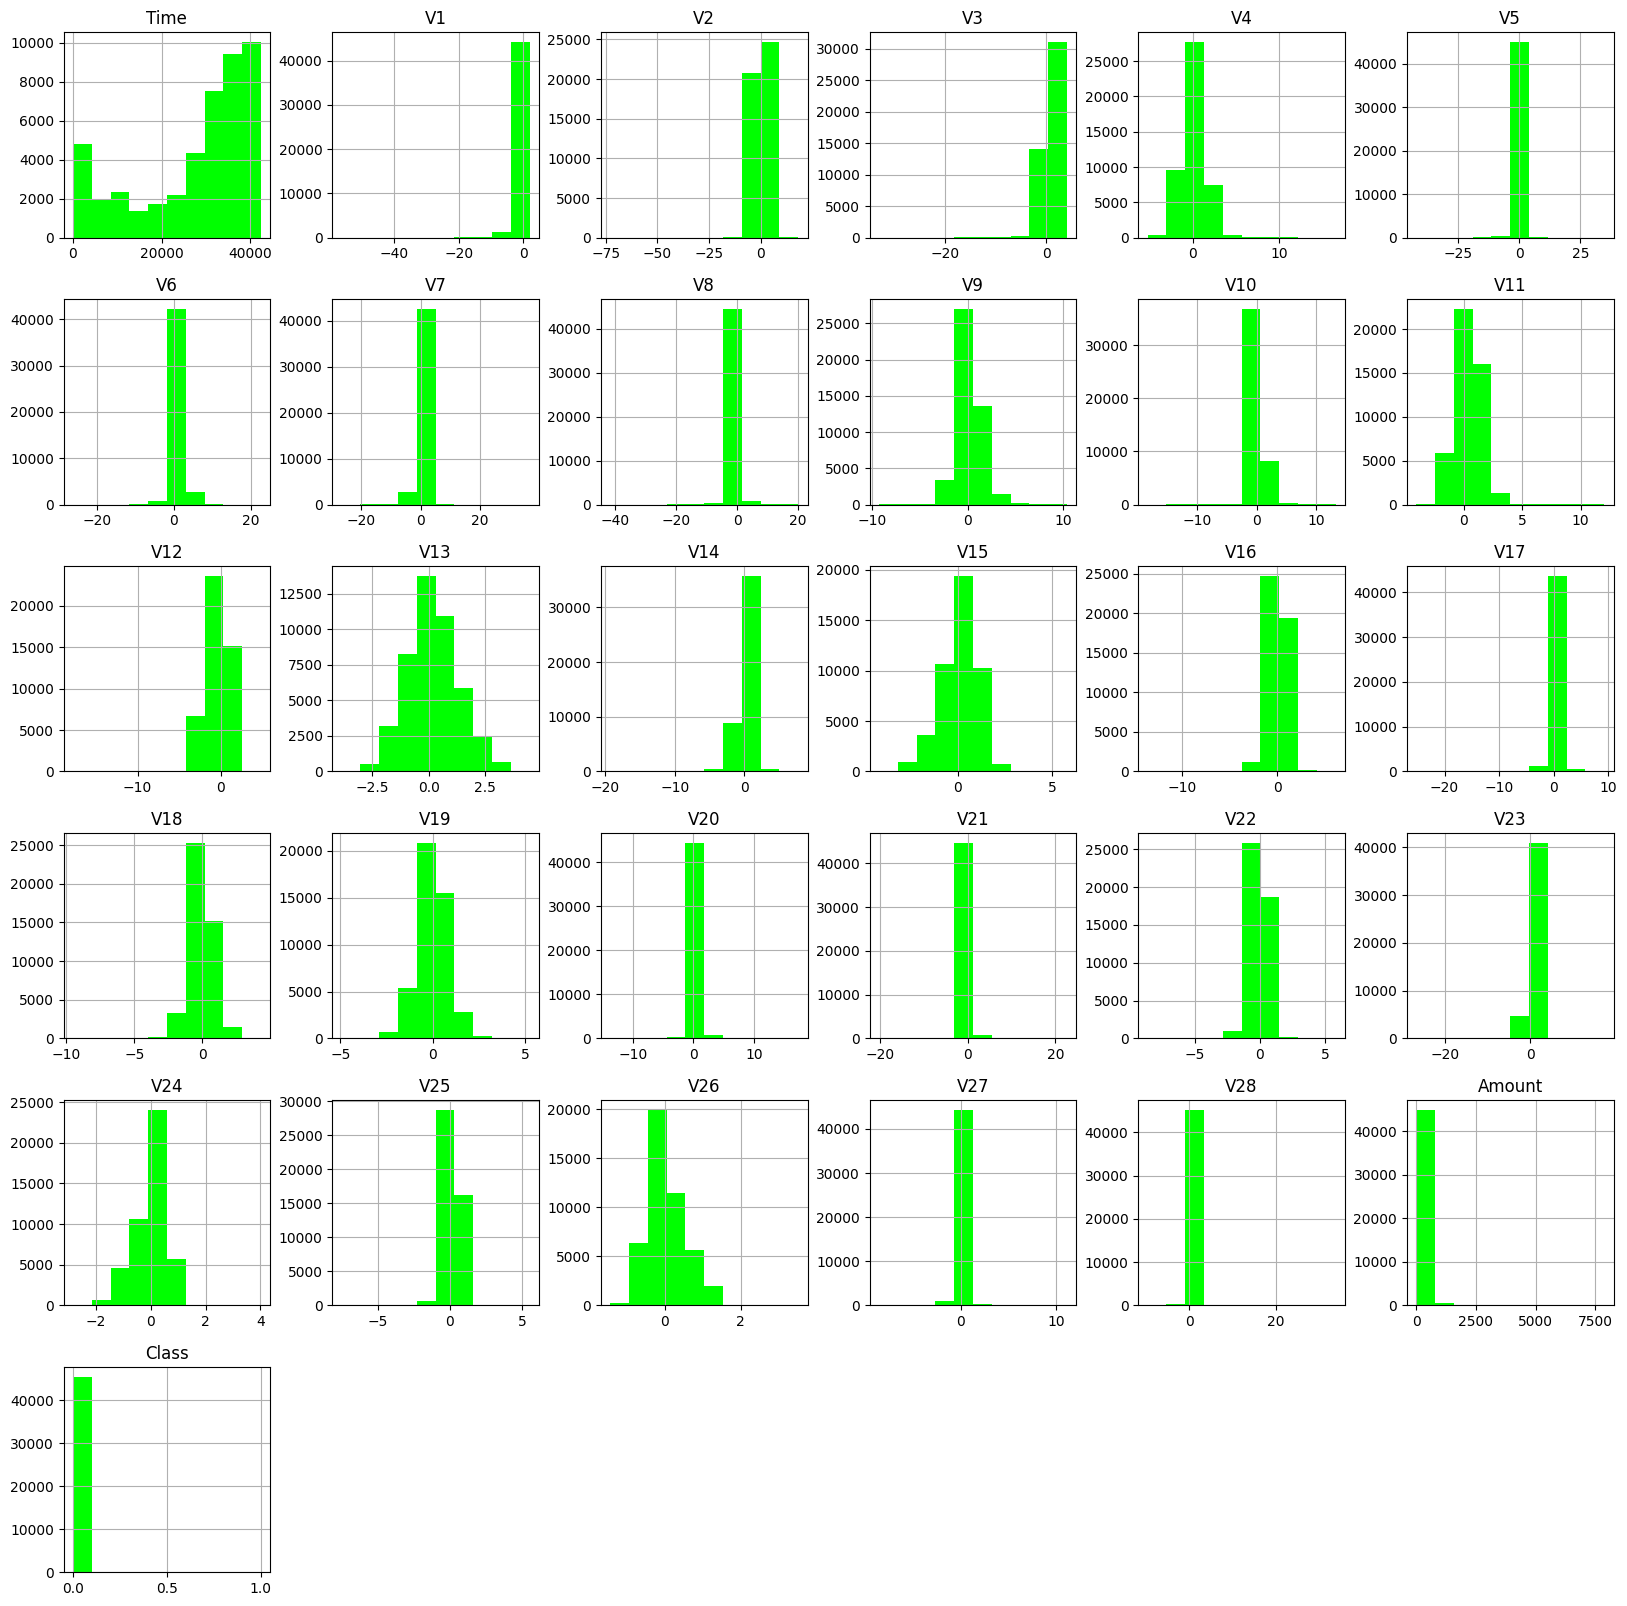

In [ ]:
data.hist(figsize=(20,20),color='lime')
plt.show()

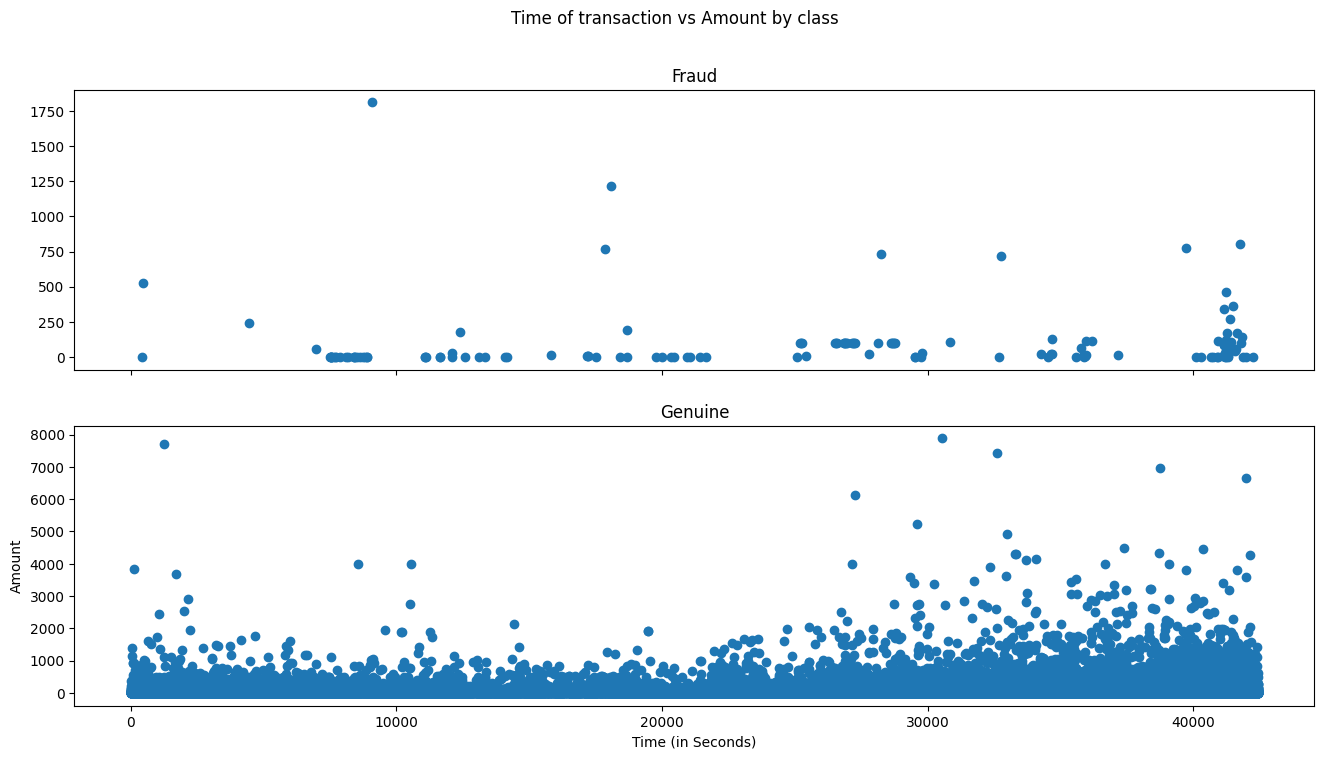

In [ ]:
rcParams['figure.figsize'] = 16, 8
f,(ax1, ax2) = plt.subplots(2, 1, sharex=True)
f.suptitle('Time of transaction vs Amount by class')
ax1.scatter(fraud.Time, fraud.Amount)
ax1.set_title('Fraud')
ax2.scatter(genuine.Time, genuine.Amount)
ax2.set_title('Genuine')
plt.xlabel('Time (in Seconds)')
plt.ylabel('Amount')
plt.show()

<Axes: >

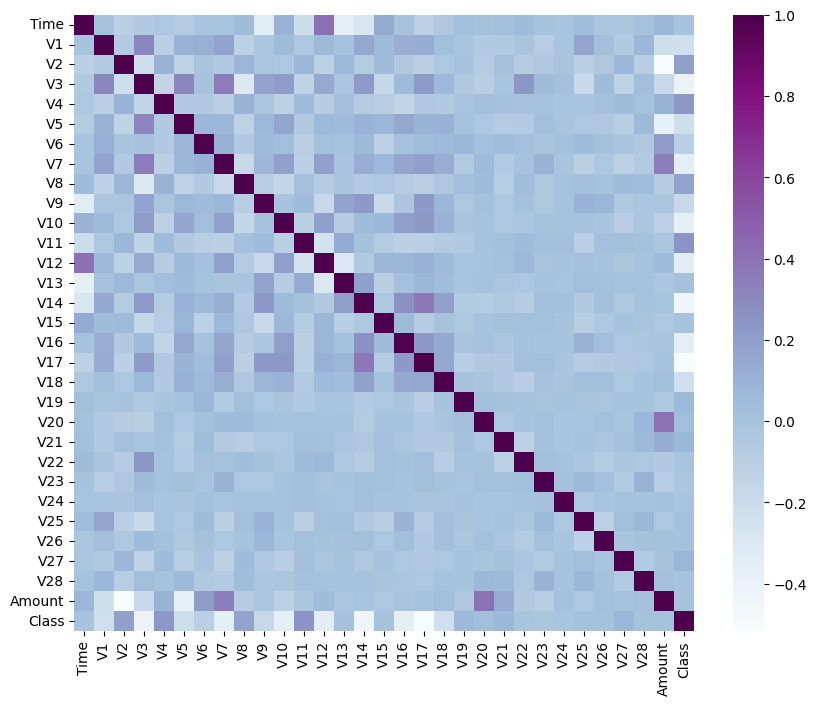

In [ ]:
plt.figure(figsize=(10,8))
corr=data.corr()
sns.heatmap(corr,cmap='BuPu')

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
# Drop rows with missing values
X_train.dropna(inplace=True)
y_train = y_train[X_train.index]  # Adjust y_train accordingly
X_test.dropna(inplace=True)
y_test = y_test[X_test.index]  # Adjust y_test accordingly

# Continue with model training as before
rfc = RandomForestClassifier()
model = rfc.fit(X_train, y_train)
prediction = model.predict(X_test)


In [ ]:
from sklearn.metrics import accuracy_score
print("accuracy: ",accuracy_score(y_test,prediction))

accuracy:  0.999196728494231


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Drop rows with missing values in both X1 and y1
X1.dropna(inplace=True)
y1 = y1[X1.index]

X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.3, random_state=123)

lr = LogisticRegression()
model2 = lr.fit(X1_train, y1_train)
prediction2 = model2.predict(X1_test)

accuracy2 = accuracy_score(y1_test, prediction2)
print("Accuracy:", accuracy2)


Accuracy: 0.9972250620709799


In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

X2 = data.drop(['Class'], axis=1)
y2 = data['Class']

# Drop rows with missing values
X2.dropna(inplace=True)
y2 = y2[X2.index]

X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.3, random_state=123)

dt = DecisionTreeRegressor()
model3 = dt.fit(X2_train, y2_train)
prediction3 = model3.predict(X2_test)

print("accuracy:",accuracy_score(y2_test,prediction3))


accuracy: 0.9993427778589163


In [ ]:
from sklearn.metrics import accuracy_score
print("accuracy with random forest: ",accuracy_score(y_test,prediction))

accuracy with random forest:  0.999196728494231


In [ ]:
print("Accuracy with Logistic Regression:", accuracy2)


Accuracy with Logistic Regression: 0.9972250620709799


In [ ]:
print("accuracy with decision tree:",accuracy_score(y2_test,prediction3))

accuracy with decision tree: 0.9993427778589163
